# Decision Tree(의사결정나무)

## lib와 데이터 로딩

In [34]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

In [35]:
data_path = 'data_ml/Social_Network_Ads.csv'
df = pd.read_csv(data_path)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [37]:
# Target 컬럼을 y로 만든다
y = df['Purchased']

In [38]:
# 모델이 예측할 때 참고해야 할 컬럼들만 모아서 X로 만든다
X = df.loc[:, ['Gender', 'Age', 'EstimatedSalary']]

In [39]:
# 방법 1: map 사용 (가장 직관적)
X['Gender'] = X['Gender'].map({'Male': 0, 'Female': 1})
# 방법 2
# X['Gender'] = X['Gender'].replace({'Male': 0, 'Female': 1})

In [40]:
X.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [41]:
y.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

## train, test 데이터 분할
- 의사결정 나무는 스케일을 할 필요가 없음

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [44]:
X_train.shape, y_train.shape

((300, 3), (300,))

In [45]:
X_test.shape, y_test.shape

((100, 3), (100,))

## 모델 학습

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
classifier = DecisionTreeClassifier()

In [48]:
classifier.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import classification_report, accuracy_score

# y_test: 실제 라벨, y_pred: 모델 예측 라벨
print("정확도:", accuracy_score(y_test, y_pred))
print("\n[정밀도, 재현율, F1-score 요약 보고서]")
print(classification_report(y_test, y_pred))

정확도: 0.82

[정밀도, 재현율, F1-score 요약 보고서]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        68
           1       0.73      0.69      0.71        32

    accuracy                           0.82       100
   macro avg       0.80      0.78      0.79       100
weighted avg       0.82      0.82      0.82       100



# 학습모델 결정트리 시각화

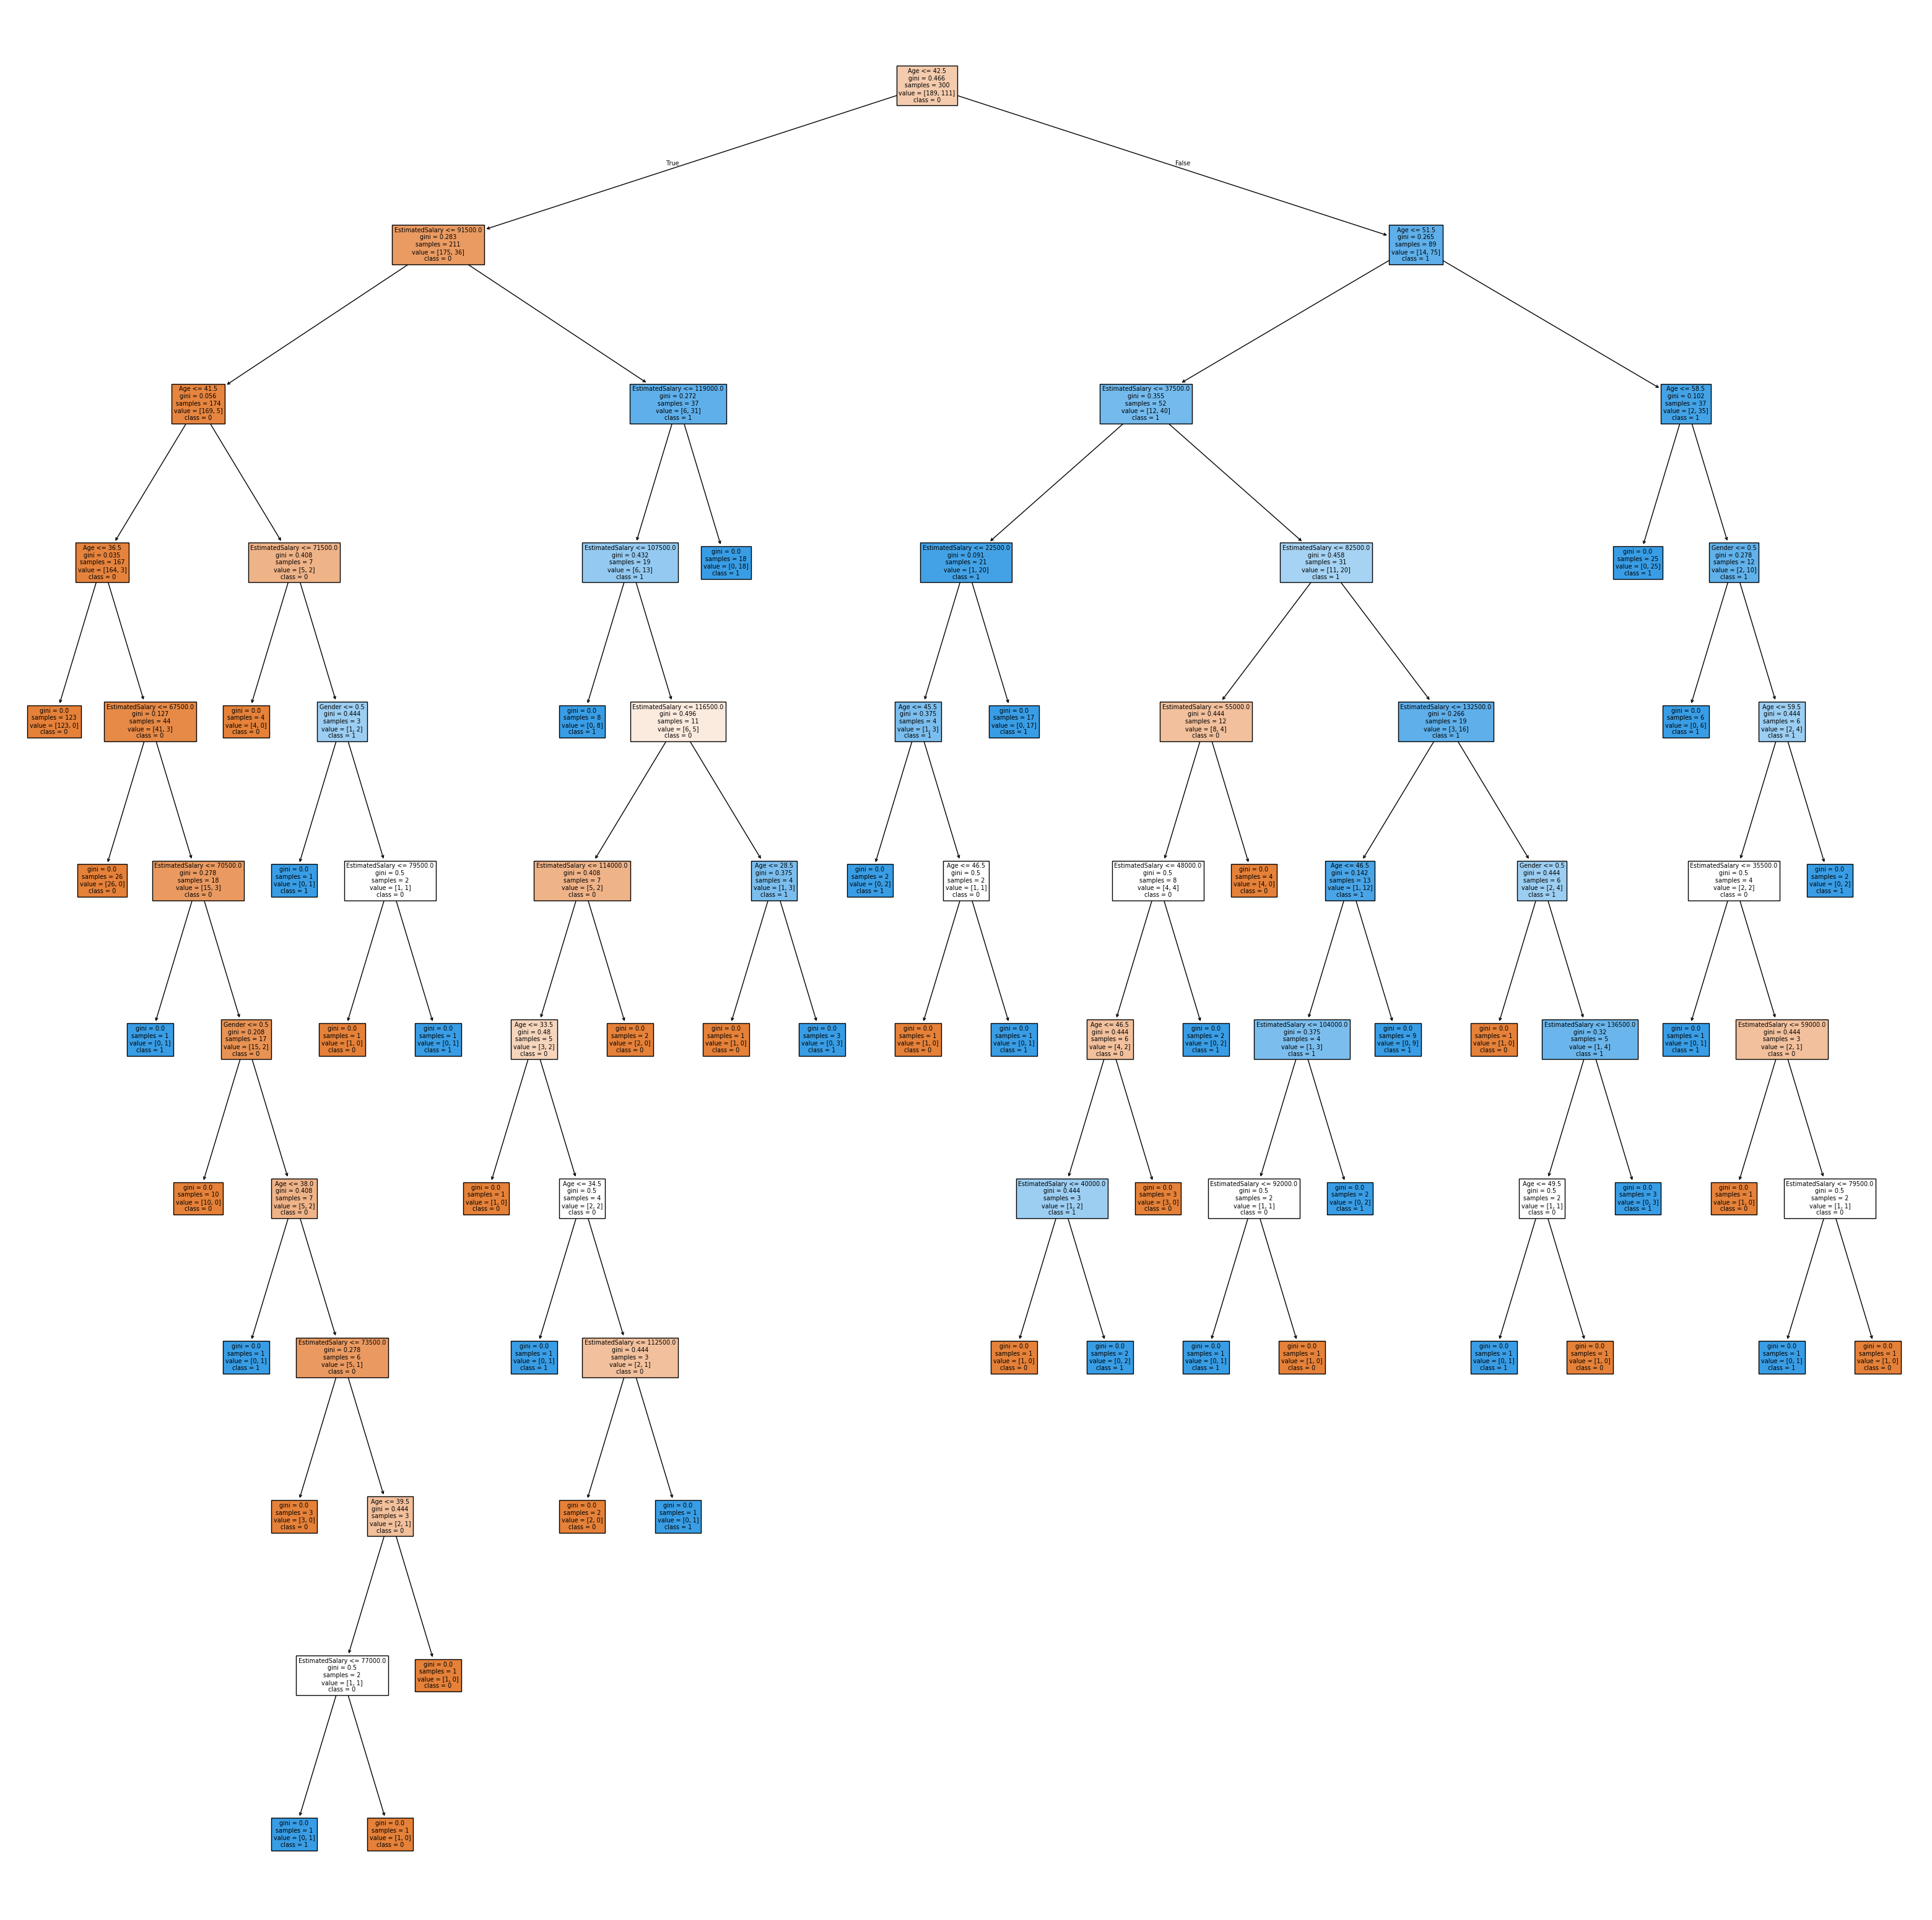

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import os

# 시각화
plt.figure(figsize=(40, 40))
plot_tree(
    classifier, 
    filled=True, 
    feature_names=X.columns, 
    class_names=['0','1']
)
os.makedirs("images_output", exist_ok=True)
plt.savefig("images_output/dt_img.jpg")
plt.show()

# 랜덤포레스트

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [54]:
y_pred = rf_classifier.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
confusion_matrix(y_test, y_pred)

array([[63,  5],
       [ 6, 26]])

In [57]:
from sklearn.metrics import classification_report, accuracy_score

# y_test: 실제 라벨, y_pred: 모델 예측 라벨
print("정확도:", accuracy_score(y_test, y_pred))
print("\n[정밀도, 재현율, F1-score 요약 보고서]")
print(classification_report(y_test, y_pred))

정확도: 0.89

[정밀도, 재현율, F1-score 요약 보고서]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        68
           1       0.84      0.81      0.83        32

    accuracy                           0.89       100
   macro avg       0.88      0.87      0.87       100
weighted avg       0.89      0.89      0.89       100



# xgboost 모델 사용

In [58]:
from xgboost import XGBClassifier

In [64]:
params = {
    "max_depth": 6,
    "learning_rate": 0.05,
    "n_estimators": 800,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 3,
    "gamma": 0.1,
    "reg_alpha": 0.0,
    "reg_lambda": 1.0,
    "objective": "binary:logistic",
    "eval_metric": "logloss"
}


In [72]:
**params

SyntaxError: invalid syntax (4222905905.py, line 1)

In [65]:
xgb_classifier = XGBClassifier()

In [66]:
xgb_classifier.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [67]:
y_pred = xgb_classifier.predict(X_test)

In [68]:
from sklearn.metrics import classification_report, accuracy_score

# y_test: 실제 라벨, y_pred: 모델 예측 라벨
print("정확도:", accuracy_score(y_test, y_pred))
print("\n[정밀도, 재현율, F1-score 요약 보고서]")
print(classification_report(y_test, y_pred))

정확도: 0.87

[정밀도, 재현율, F1-score 요약 보고서]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        68
           1       0.79      0.81      0.80        32

    accuracy                           0.87       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100



# Precision -Recall Curve로 최적 Throshold 찾기

In [77]:
from sklearn.metrics import precision_recall_curve, classification_report
import numpy as np

In [74]:
# 확률 예츠
y_proba = xgb_classifier.predict_proba(X_test)[:,1]

In [75]:
# 다양한 테스트
y_proba = xgb_classifier.predict_proba(X_test)[:, 1]

thresholds = [0.3, 0.5, 0.7, 0.9]
for threshold in thresholds:
    y_pred = (y_proba >= threshold).astype(int)
    print(f"\n=== Threshold: {threshold} ===")
    print(classification_report(y_test, y_pred))


=== Threshold: 0.3 ===
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        68
           1       0.69      0.84      0.76        32

    accuracy                           0.83       100
   macro avg       0.81      0.83      0.81       100
weighted avg       0.85      0.83      0.83       100


=== Threshold: 0.5 ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        68
           1       0.79      0.81      0.80        32

    accuracy                           0.87       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.87      0.87      0.87       100


=== Threshold: 0.7 ===
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        68
           1       0.86      0.78      0.82        32

    accuracy                           0.89       100
   macro avg       0.88      0.86      0.87       100
we

# 최적 Threshold 찾기

In [70]:
y_proba = xgb_classifier.predict_proba(X_test)[:, 1]

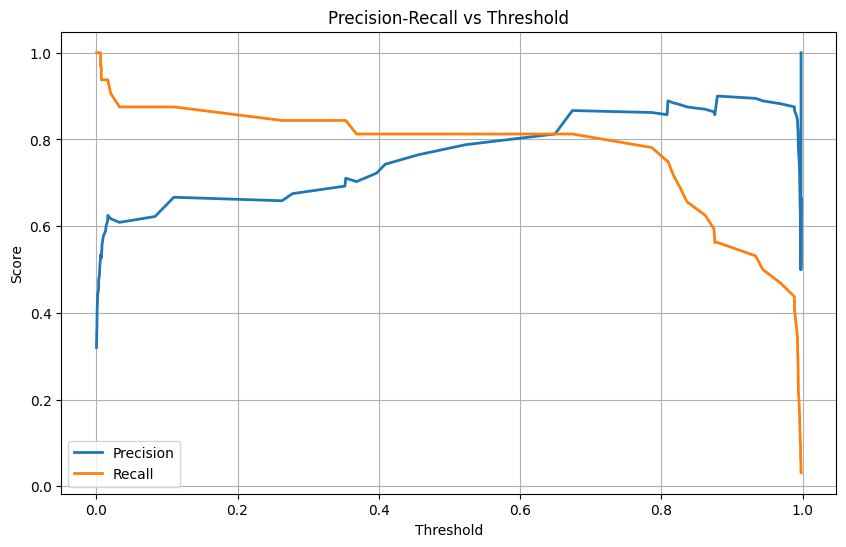

Optimal Threshold (F1 maximized): 0.674
Precision: 0.867
Recall: 0.812
F1-Score: 0.839


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Precision-Recall curve 계산
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', linewidth=2)
plt.plot(thresholds, recall[:-1], label='Recall', linewidth=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall vs Threshold')
plt.grid(True)
plt.show()

# F1-Score가 최대인 threshold 찾기
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_idx = np.argmax(f1_scores[:-1])
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold (F1 maximized): {optimal_threshold:.3f}")
print(f"Precision: {precision[optimal_idx]:.3f}")
print(f"Recall: {recall[optimal_idx]:.3f}")
print(f"F1-Score: {f1_scores[optimal_idx]:.3f}")